In [1]:
import sys
sys.path.insert(0,'../../../')
import flexpart_management.notebooks.sulfate_simple_cluster_corr_paper. \
    sulfate_simple_cluster_corr_paper_lfc as lfc
from flexpart_management.notebooks.sulfate_simple_cluster_corr_paper. \
    sulfate_simple_cluster_corr_paper_lfc import *

reload


2021-01-26 19:52:22,014 useful_scit  WARNING  rpy2 not installed. Everything works except functions requiring r


2021-01-26 19:52:22,014 useful_scit  WARNING  rpy2 not installed. Everything works except functions requiring r


In [3]:
sul = 'Sulfate'
lab_name = 'lab_name'

In [183]:
acsm = lfc.get_acsm_data()

/Users/diego/miniconda3/envs/b36/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/diego/miniconda3/envs/b36/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/diego/miniconda3/envs/b36/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

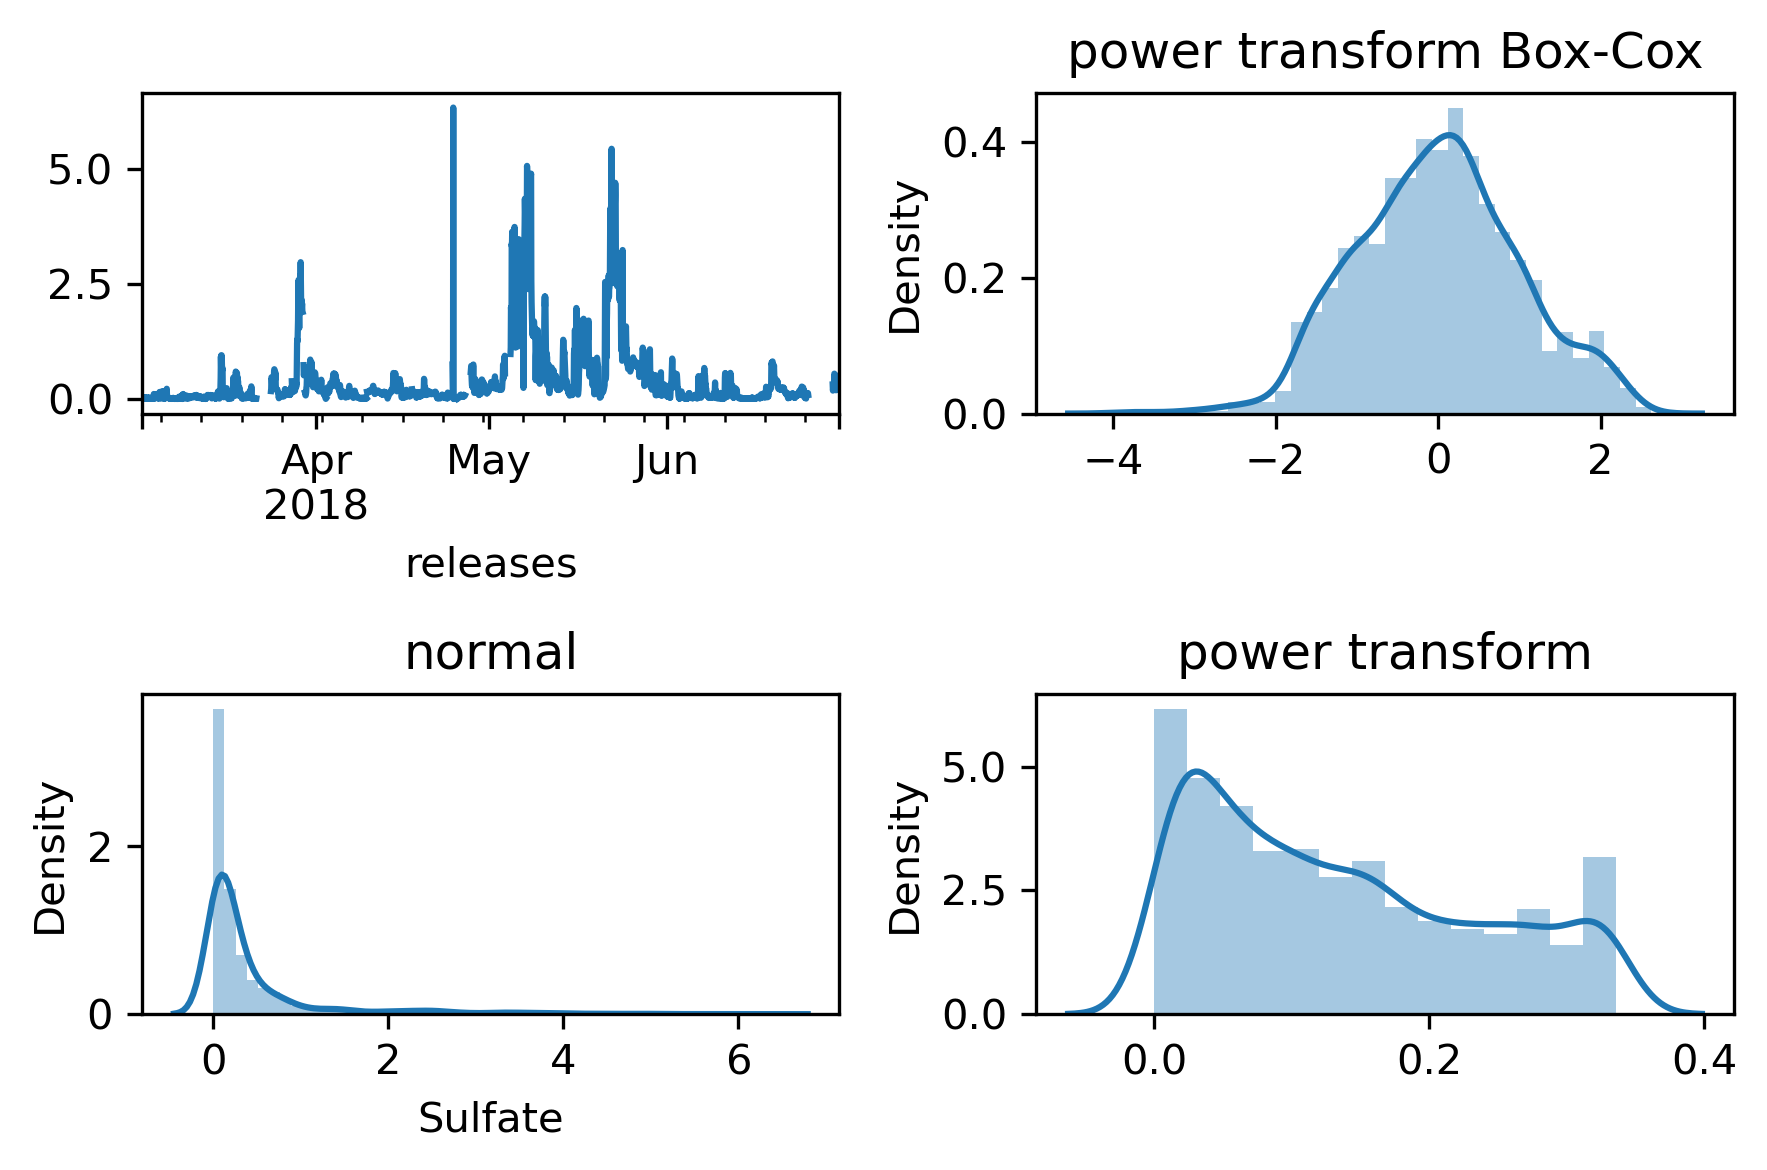

In [5]:
lfc.plot_distributions(acsm, sul)

In [8]:
ds = xr.open_dataset(
'../../releases/v03/data/cluster_series_v3.nc')

In [138]:
ar  = ds['conc_lab_nc18'].loc[
    {'z_column':'ALL','normalized':0}]

In [178]:
ar1 = ar.reset_coords(drop=True).to_dataframe().unstack(0)['conc_lab_nc18']

<AxesSubplot:xlabel='releases'>

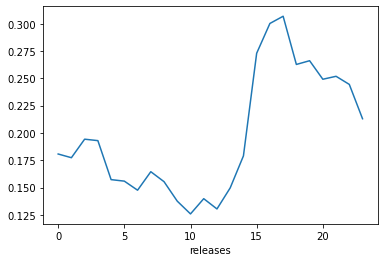

In [179]:
acsm['Organics'].groupby(acsm.index.hour).median().plot()

<AxesSubplot:xlabel='releases'>

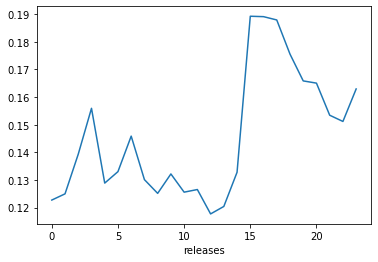

In [180]:
acsm['Sulfate'].groupby(acsm.index.hour).median().plot()

<AxesSubplot:xlabel='releases'>

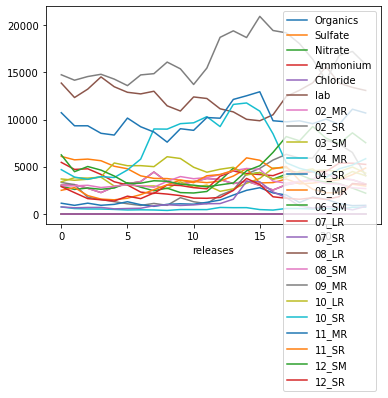

In [182]:
acsm.groupby(acsm.index.hour).median().plot()

In [224]:
labs = ar1.columns

In [184]:
acsm[ar1.columns.values] = ar1[ar1.columns.values]

In [185]:
ac1 = acsm.dropna(how='any')

In [186]:
import sklearn.preprocessing as sp

In [187]:
ac2 = ac1.copy()

In [217]:
ac2[ac1.columns] = sp.StandardScaler().fit_transform(ac1)

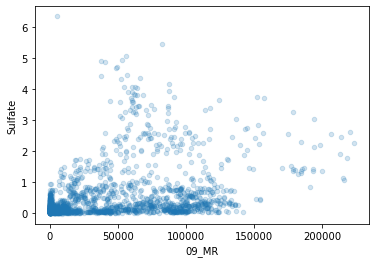

In [335]:
ac1.plot.scatter(x='09_MR',y='Sulfate',alpha=.2)
ax = plt.gca()
# ax.set_xlim(.1,1000000)
# ax.set_ylim(.1,10)
# ax.set_xscale('log')
# ax.set_yscale('log')

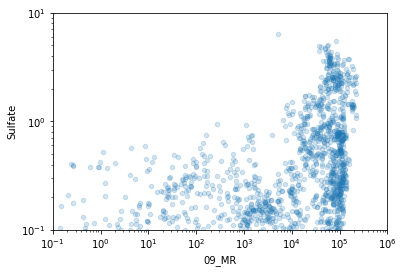

In [337]:
ac1.plot.scatter(x='09_MR',y='Sulfate',alpha=.2)
ax = plt.gca()
ax.set_xlim(.1,1000000)
ax.set_ylim(.1,10)
ax.set_xscale('log')
ax.set_yscale('log')

In [219]:
import scipy.stats

In [227]:
res = [scipy.stats.pearsonr(ac2[l],ac2['Sulfate']) for l in labs]
    

In [234]:
res1 = pd.DataFrame(res,index=labs,columns=['r','p'])

<AxesSubplot:xlabel='lab_nc18'>

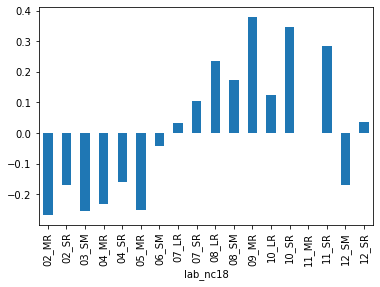

In [236]:
res1['r'].plot.bar()

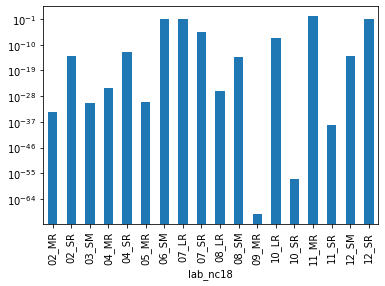

In [267]:
res1['p'].plot.bar()
plt.gca().set_yscale('log')

In [239]:
res1

,r,p
lab_nc18,,
02_MR,-0.267136,2.383265e-34
02_SR,-0.171281,9.138178e-15
03_SM,-0.253781,4.674370e-31
04_MR,-0.230713,8.203075e-26
04_SR,-0.160627,3.813108e-13
05_MR,-0.252016,1.231842e-30
06_SM,-0.040885,6.618315e-02
07_LR,0.033964,1.270089e-01
07_SR,0.104215,2.681911e-06


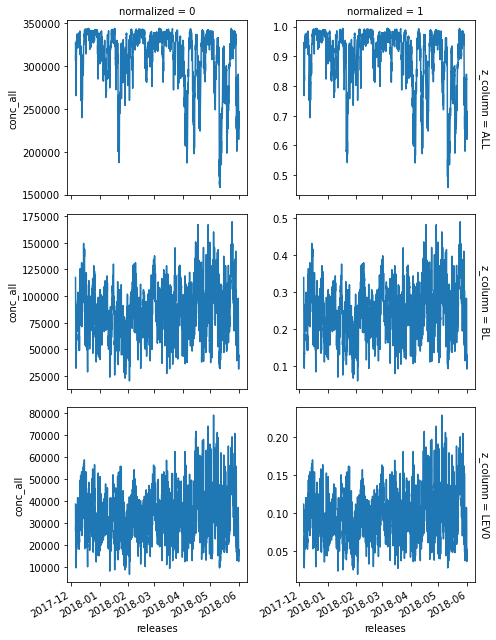

In [246]:
ds['conc_all'].plot(col='normalized',row='z_column',
                   sharey=False)

In [249]:
24 * 4 * 3600

345600

In [254]:
aa=ds['conc_all'].loc[{'normalized':0,'z_column':'ALL'}]
aa.max(),aa.mean(),aa.median()


(<xarray.DataArray 'conc_all' ()>
 array(343658.51789496)
 Coordinates:
     normalized  int64 0
     z_column    <U3 'ALL',
 <xarray.DataArray 'conc_all' ()>
 array(310705.35254386)
 Coordinates:
     normalized  int64 0
     z_column    <U3 'ALL',
 <xarray.DataArray 'conc_all' ()>
 array(323471.51923614)
 Coordinates:
     normalized  int64 0
     z_column    <U3 'ALL')

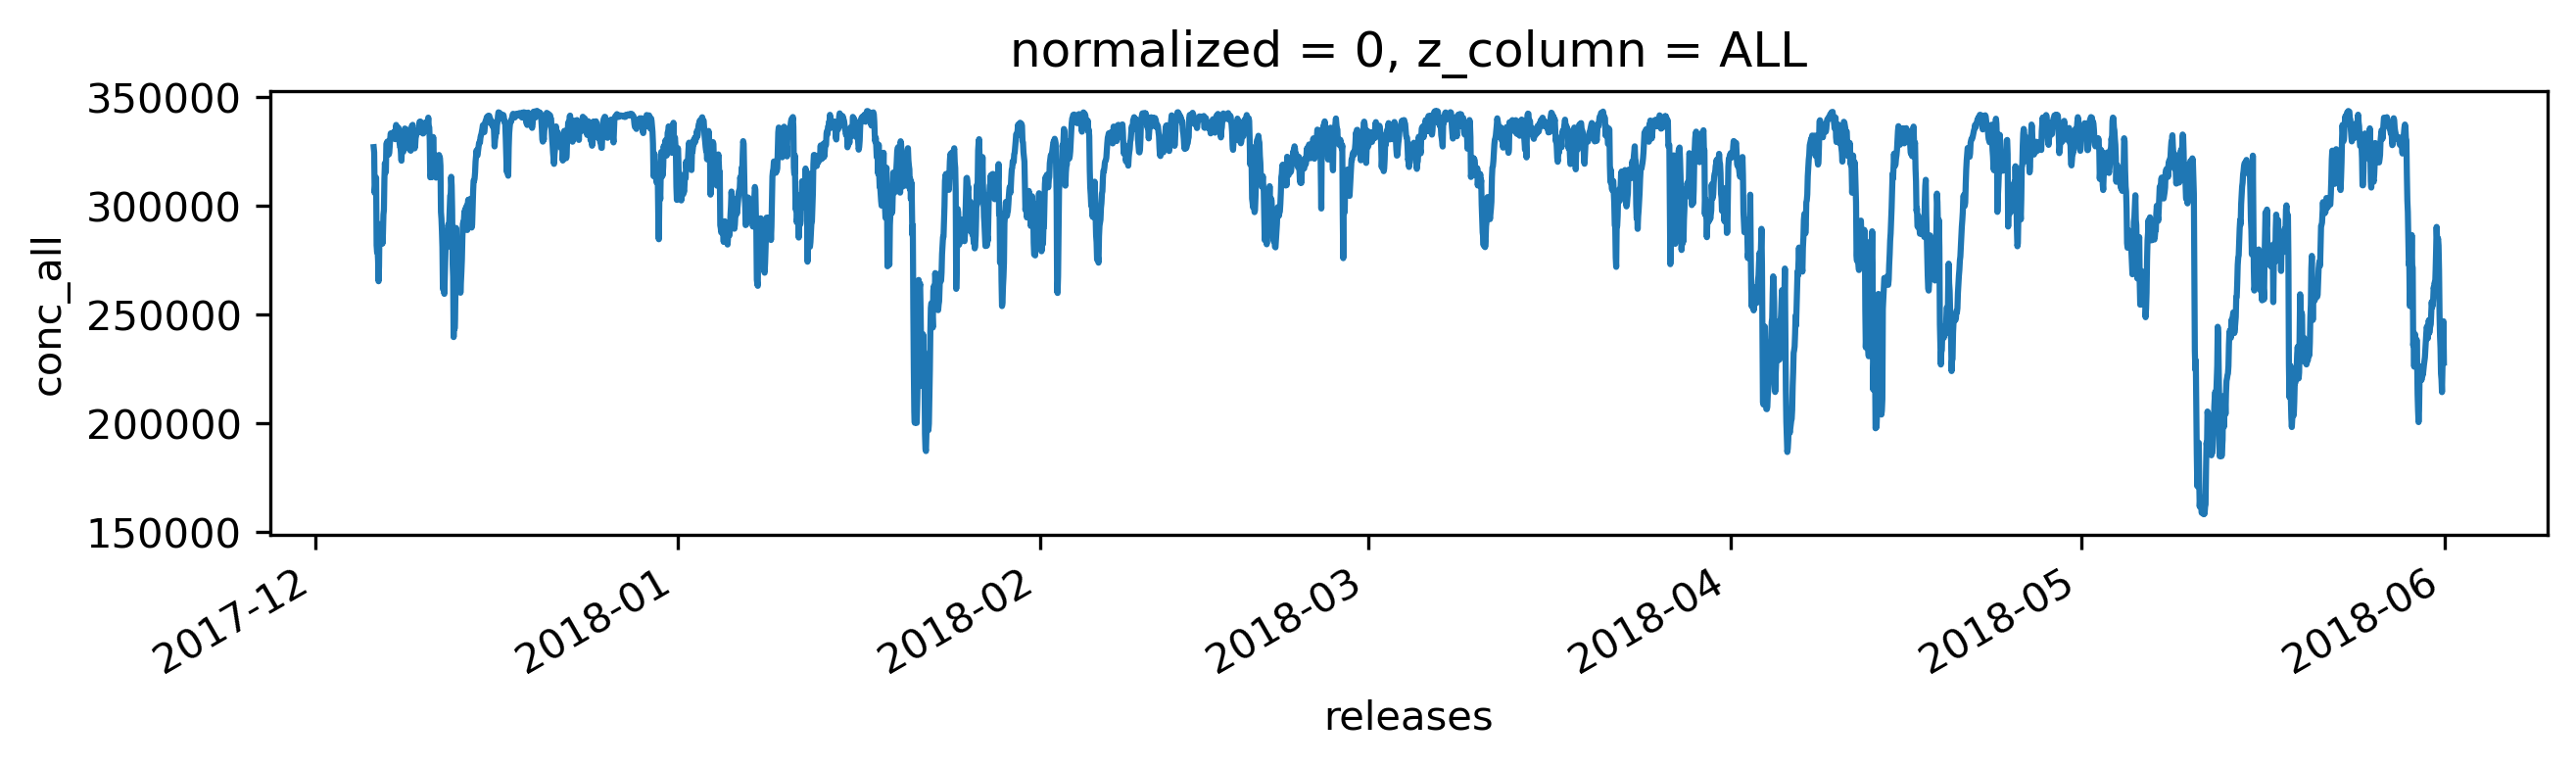

In [264]:
plt.figure(dpi=300,figsize=(10,2))
aa.plot()

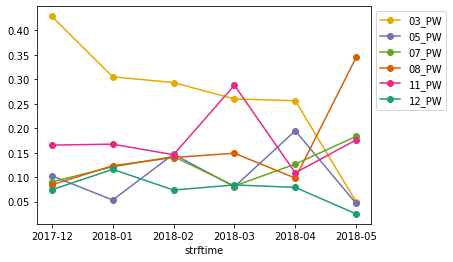

In [334]:
bb= ds.loc[{'z_column':'ALL','normalized':1}]['conc_lab_nc06']
bd = bb.groupby(bb['releases'].dt.strftime('%Y-%m')).mean().to_dataframe()
bd = bd['conc_lab_nc06'].unstack(0)
kk = co.pw_col_dict.keys()
bd[kk].plot(marker='o',color=list(co.pw_col_dict.values()))
ax = plt.gca()
ax.legend(loc='upper left',bbox_to_anchor=(1,1))

In [314]:
round(bd * 100).astype(int)

lab_nc06,03_PW,05_PW,07_PW,08_PW,11_PW,12_PW
strftime,,,,,,
2017-12,43,10,9,8,17,7
2018-01,30,5,12,12,17,12
2018-02,29,15,14,14,15,7
2018-03,26,8,8,15,29,8
2018-04,26,19,13,10,11,8
2018-05,5,5,18,34,18,2


In [300]:
co.pw_col_dict.values()

dict_values([(0.9019607843137255, 0.6705882352941176, 0.00784313725490196), (0.4588235294117647, 0.4392156862745098, 0.7019607843137254), (0.4, 0.6509803921568628, 0.11764705882352941), (0.8509803921568627, 0.37254901960784315, 0.00784313725490196), (0.9058823529411765, 0.1607843137254902, 0.5411764705882353), (0.10588235294117647, 0.6196078431372549, 0.4666666666666667)])

<AxesSubplot:xlabel='strftime'>

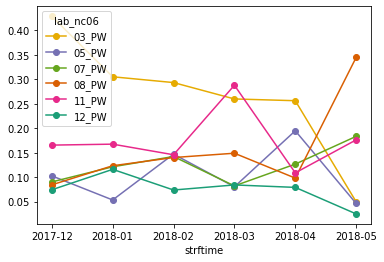